In [9]:
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1: Preparing Dataset

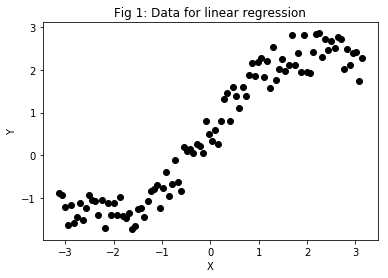

In [3]:
x = np.linspace(-np.pi, np.pi, 100)
y = 0.5*x + np.sin(x) + np.random.random(x.shape)
plt.scatter(x, y, color='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fig 1: Data for linear regression')
plt.show()

In [4]:
## Step 2: Splitting the Dataset

In [5]:
indices = np.random.permutation(100)
# 70%
x_train = x[indices[:70]]
y_train = y[indices[:70]]

# 15%
x_val = x[indices[70:85]]
y_val = y[indices[70:85]]

# 15%
x_test = x[indices[85:]] 
y_test = y[indices[85:]]

## Step 3: Line Fitting

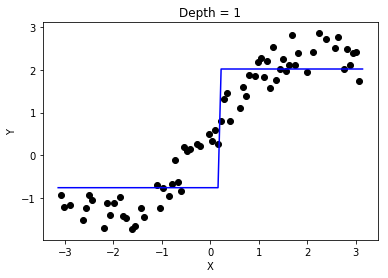

Training MSE:  0.3842656325274752 
Validation MSE:  0.3800847290978044 
Test MSE:  0.34184642227617357


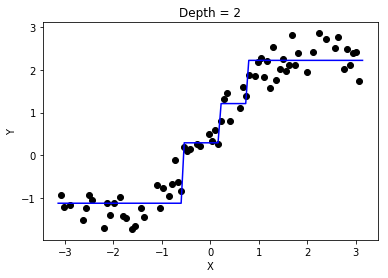

Training MSE:  0.10973547886822654 
Validation MSE:  0.07725285356982288 
Test MSE:  0.1621666070940057


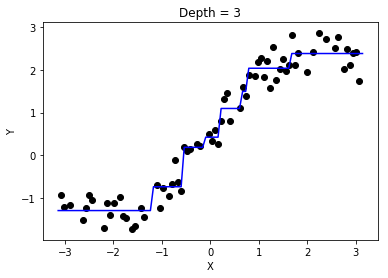

Training MSE:  0.06799865317065425 
Validation MSE:  0.06252411374805437 
Test MSE:  0.10476109765363592


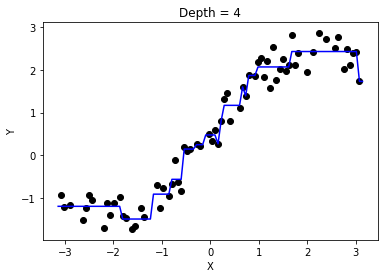

Training MSE:  0.049428189203892206 
Validation MSE:  0.11028725944351749 
Test MSE:  0.11289805060105258


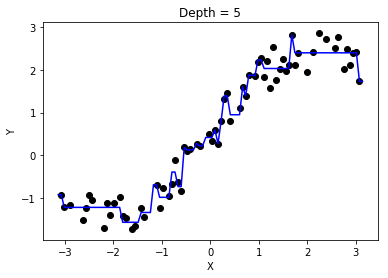

Training MSE:  0.03819267773057017 
Validation MSE:  0.10303607607272162 
Test MSE:  0.1294730596937191


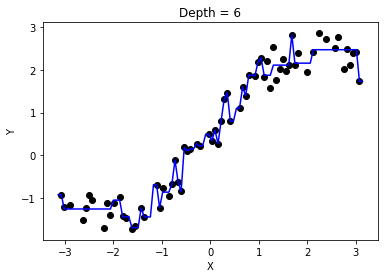

Training MSE:  0.02606468639140316 
Validation MSE:  0.10254748242020781 
Test MSE:  0.13109720866938032


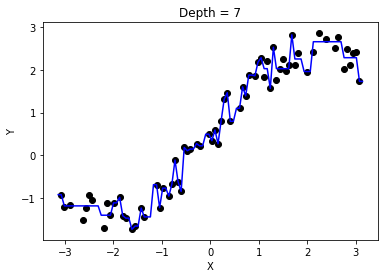

Training MSE:  0.013341807727527877 
Validation MSE:  0.10063432095757249 
Test MSE:  0.1527886576959951


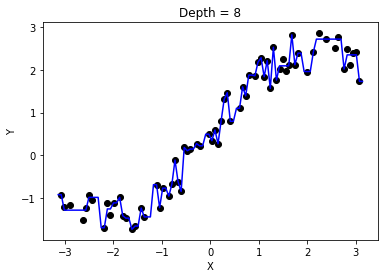

Training MSE:  0.0045782936432374735 
Validation MSE:  0.10390238895750271 
Test MSE:  0.17625026065724994


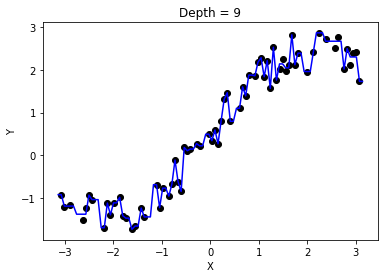

Training MSE:  0.002477205644393056 
Validation MSE:  0.11318141473950917 
Test MSE:  0.18152686036053298


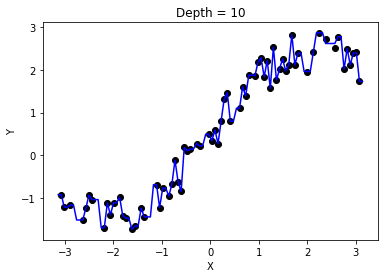

Training MSE:  0.00038602226363453437 
Validation MSE:  0.11762992126367774 
Test MSE:  0.1817407348478441


In [15]:
tree_depth = np.arange(10) + 1
training = []
validation = []
testing = []

for depth in tree_depth:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    
    X = np.matrix(x_train.reshape(len(x_train),1))
    Y = np.matrix(y_train.reshape(len(y_train),1))
    
    model.fit(X, Y)
    
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Depth = ' + str(depth))
    plt.show()

    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train), 1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val), 1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test), 1)))**2 )
    
    training.append(mean_train_error)
    validation.append(mean_val_error)
    testing.append(mean_test_error)
    
    print('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

## Plotting Training, Validation and Testing

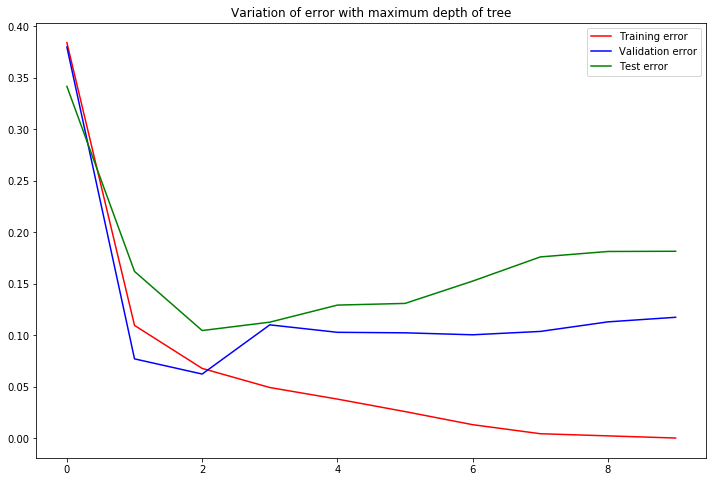

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(training,c='red')
plt.plot(validation,c='blue')
plt.plot(testing,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()